Introduceti numele imaginii: 1.jpg
Imaginea initiala:
Dimensiune initiala:
2229000 bytes


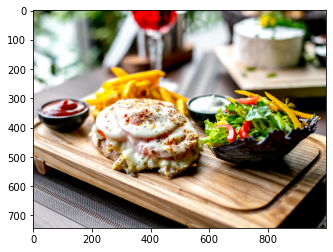

interactive(children=(IntSlider(value=372, description='k', max=743, min=1), Output()), _dom_classes=('widget-…

<function __main__.Compression(k)>

In [1]:
#COLOCVIU_Pantu_Mihnea-Andrei__Toma_Alexandru-Ionel_322AC

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact,interactive,interact_manual
import ipywidgets as widgets

img = input('Introduceti numele imaginii: ')
print("Imaginea initiala:")
pic = plt.imread(img) #Citim imaginea din fisier in matrice.
plt.imshow(pic)

print("Dimensiune initiala:")
print(pic.nbytes, "bytes")
      
pic_red = pic[:,:,0] #Alegem intai culoarea rosu din tripletul RGB si o stocam intr-o matrice
pic_green = pic[:,:,1] #Ulterior culoarea verde
pic_blue = pic[:,:,2] #La final culoarea albastra

U_red,S_red,V_red = np.linalg.svd(pic_red) #Aplicam DVS pe matricea in care stocam componentele rosii
U_green,S_green, V_green = np.linalg.svd(pic_green) #Aplicam DVS pe matricea in care stocam componentele verzi
U_blue, S_blue, V_blue = np.linalg.svd(pic_blue) #Aplicam DVS pe matricea in care stocam componentele albastre

def Compression(k):     #Functie ce va realiza compresia in functie de cate valori singulare utilizam
    
    R_compress = U_red[:, :k] @ np.diag(S_red[:k]) @ V_red[:k, :]
    #R_compress = R_compress.astype(int)
    
    G_compress = U_green[:, :k] @ np.diag(S_green[:k]) @ V_green[:k, :]
    #G_compress = G_compress.astype(int)
    
    B_compress = U_blue[:, :k] @ np.diag(S_blue[:k]) @ V_blue[:k, :]
    #B_compress = B_compress.astype(int)
      
    compressed_values = np.stack((R_compress, G_compress, B_compress), axis = 2)
    
    r,c = np.shape(pic_red) #Returnam dimensiunile matricelor in care stocam componentele pe culori
    
    compress_ratio = (100 * k * (r + c + 1))/(r * c)
    
    formatted_ratio = "{:.2f}".format(compress_ratio) #Formatam procentul de compresie la 2 zecimale
    
    print("Procent de compresie", formatted_ratio, "%")
    
    new_size = (compress_ratio/100)*pic.nbytes
    new_size = "{:.0f}".format(new_size)
    
    print("Noua dimensiune a imaginii:", new_size, "Bytes")
    
    compressed_values = compressed_values/np.amax(compressed_values)
    compressed_values = np.clip(compressed_values, 0, 1)
    plt.imshow(compressed_values)
    
    
#x = input("Introduceti numarul de valori singulare pe care vreti sa le afisati:")
#x = int(x)

#Compression(x)  #Pentru introducere valori singulare de la tastatura
        
z=S_blue.shape[0] # numarul de valori singulare

interact(Compression, k = (1,z)) # slider cu numarul de valori singulare

In [19]:
np.amax(pic)

255

In [3]:
np.amin(pic)

0